In [36]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#run before importing Kmeans
import os
os.environ["OMP_NUM_THREADS"]='1'

In [37]:
#importing the dataset
dataset=pd.read_csv("Live_20210128.csv")
dataset

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [38]:
dataset.shape


(7050, 16)

In [39]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [40]:
dataset.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,7050,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [42]:
dataset.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [43]:
dataset.iloc[:,:].isnull().values.any()

True

In [44]:
dataset.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [45]:
dataset.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [46]:
dataset

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [47]:
dataset.shape

(7050, 12)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [49]:
dataset.iloc[:,0].unique()

array([   1,    2,    3, ..., 7048, 7049, 7050], dtype=int64)

In [50]:
len(dataset.iloc[:,0].unique())

7050

In [51]:
len(dataset['status_id'].unique())

7050

In [52]:
dataset['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [53]:
len(dataset['status_published'].unique())

6913

In [54]:
dataset.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [55]:
dataset

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [56]:
len(dataset['status_type'].unique())

4

In [57]:
dataset['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [58]:
Type=dataset.status_type.value_counts()
Type

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [59]:
status_type=pd.DataFrame(Type)
status_type

,status_type
photo,4288
video,2334
status,365
link,63


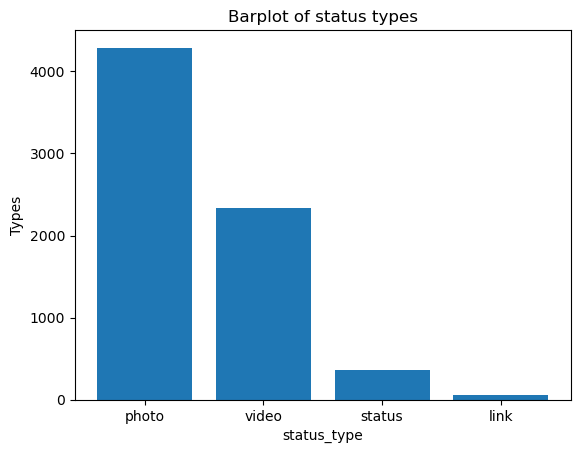

In [60]:
plt.bar(x=status_type.index,height=status_type.status_type)
plt.xlabel('status_type')
plt.ylabel('Types')
plt.title('Barplot of status types')
plt.show()

In [61]:
dataset.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [62]:
#Converting 'status_type' to numerical values
dataset.status_type=dataset.status_type.replace(['link','photo','status','video'],[0,1,2,3])
dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [63]:
X=dataset.iloc[:,1:10]
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


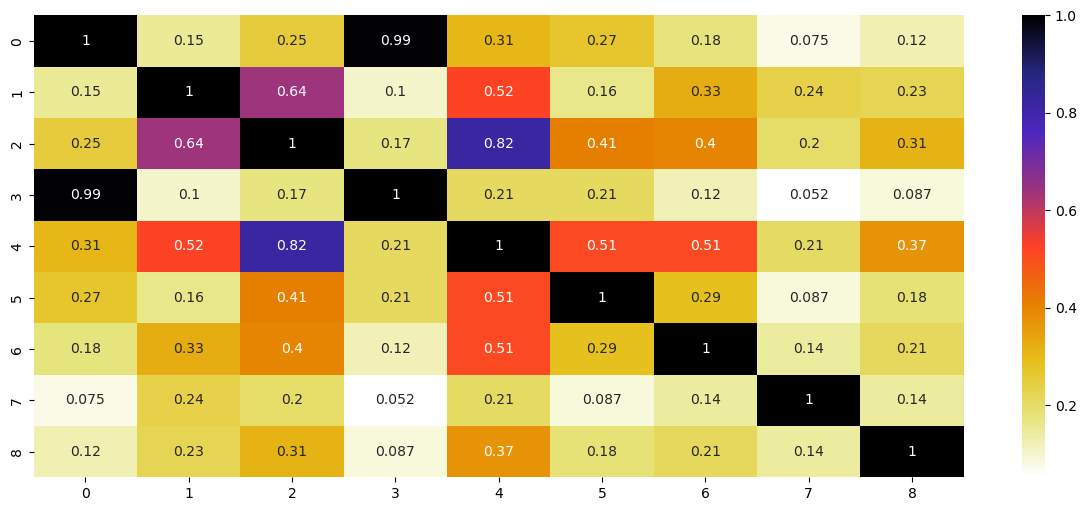

In [64]:
#Pearson correlation
plt.figure( figsize=(15, 6))
#cor=X_fs.corr()
cor = np.corrcoef(X, rowvar=False)
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [65]:
import numpy as np

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the indices of correlated columns
    corr_matrix = np.corrcoef(dataset, rowvar=False)
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix[i, j]) > threshold: # we are interested in absolute coeff value
                col_corr.add(i)
                col_corr.add(j)
    return col_corr

In [66]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

4

In [67]:
corr_features

{0, 2, 3, 4}

In [185]:
X = dataset.iloc[:, [1, 5, 6, 7, 8]]
X

,num_reactions,num_loves,num_wows,num_hahas,num_sads
0,529,92,3,1,1
1,150,0,0,0,0
2,227,21,1,1,0
3,111,0,0,0,0
4,213,9,0,0,0
...,...,...,...,...,...
7045,89,0,0,0,0
7046,16,1,0,1,0
7047,2,1,0,0,0
7048,351,2,0,0,0


In [186]:
y = dataset['status_type']
y

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int64

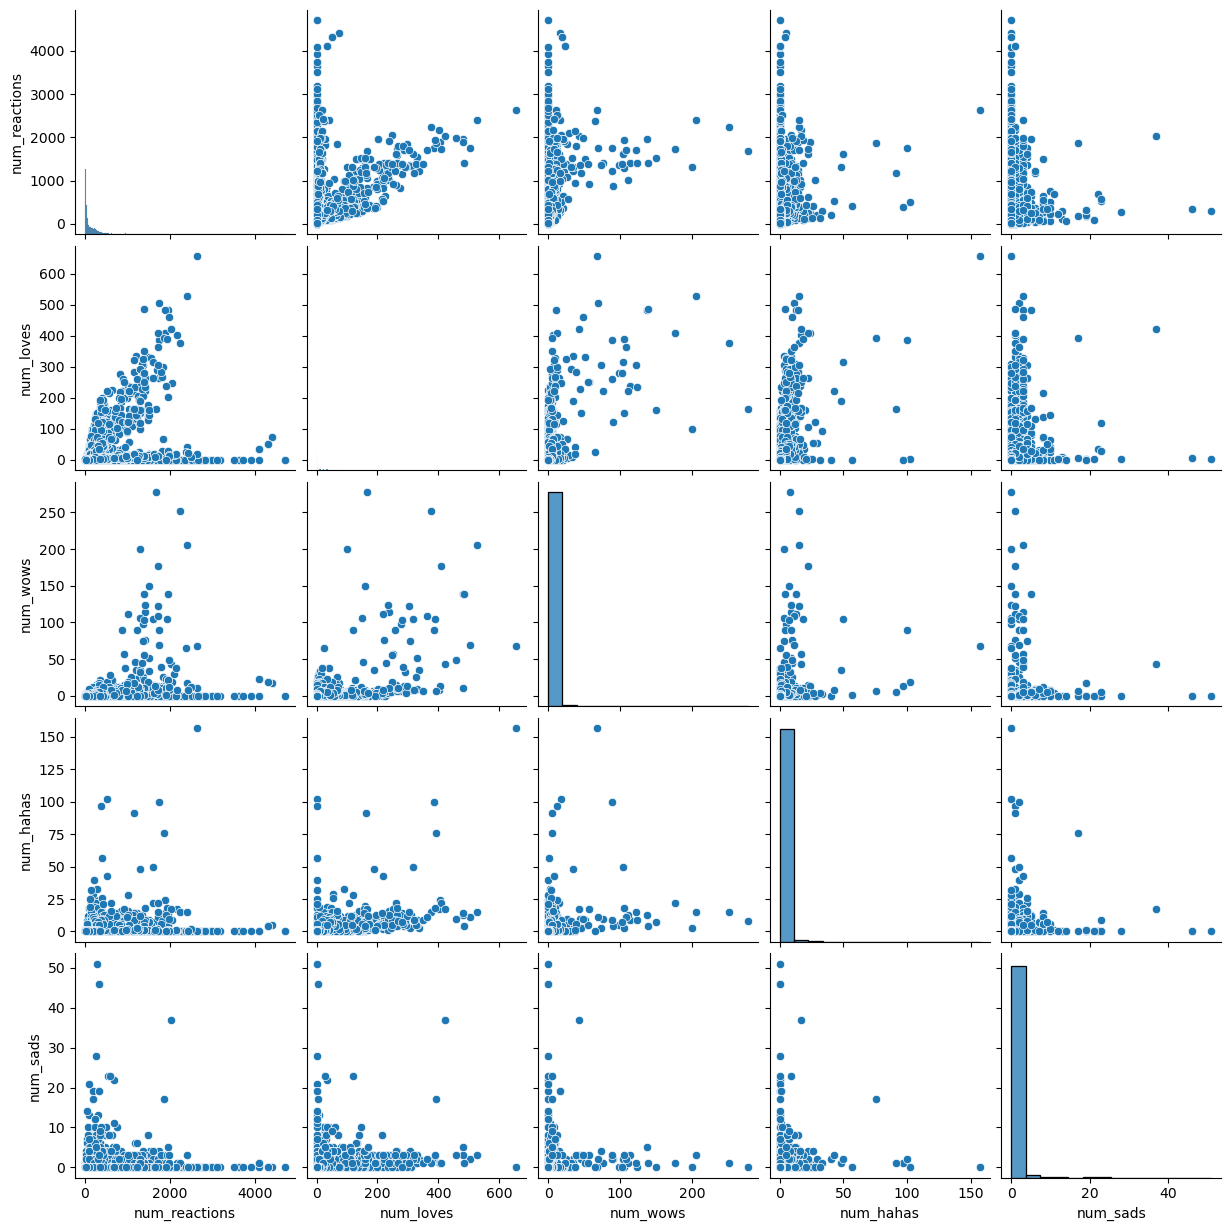

In [150]:
sns.pairplot(X)

In [187]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
X

array([[ 0.64610394,  1.98326643,  0.1961959 ,  0.07671305,  0.47357035],
       [-0.17319166, -0.3184544 , -0.147879  , -0.17600986, -0.152587  ],
       [-0.00673846,  0.2069384 , -0.03318737,  0.07671305, -0.152587  ],
       ...,
       [-0.49312768, -0.29343569, -0.147879  , -0.17600986, -0.152587  ],
       [ 0.26131603, -0.26841699, -0.147879  , -0.17600986, -0.152587  ],
       [-0.46070173, -0.3184544 , -0.147879  , -0.17600986, -0.152587  ]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

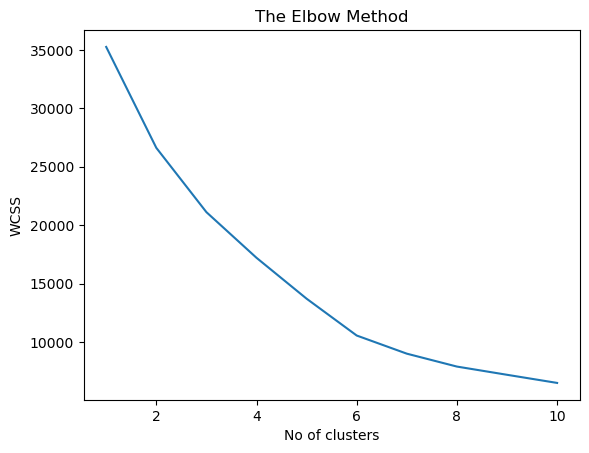

In [188]:
#using the elbow method to find the optimal number of clsuters

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [189]:
kmeans.inertia_

6501.633614552841

In [191]:
#fitting kmeans to the dataset
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)

#fits the K-Means model to your data X and assigns each data point to one of the clusters. 
#The fit_predict method does both the fitting and the prediction. 
#After running this line, y_kmeans will be a NumPy array containing cluster assignments for each data point in X
y_kmeans=kmeans.fit_predict(X)
y_kmeans

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 1, ..., 1, 1, 1])

In [192]:
#reducing dimensionality before visualizing
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.42409673, 0.19194157])

In [193]:
sum(pca.explained_variance_ratio_)

0.6160382984466172

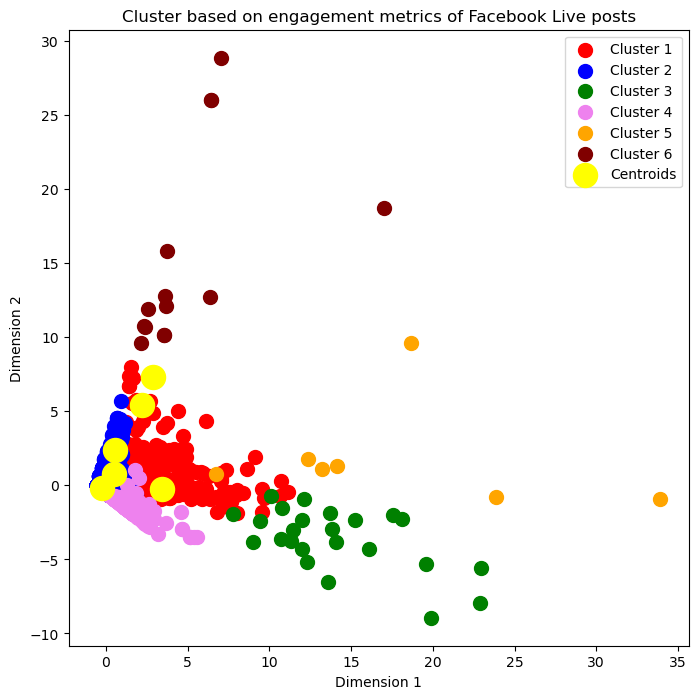

In [197]:
#Visualizing the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='violet',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='orange',label='Cluster 5')
plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=100,c='maroon',label='Cluster 6')
#plt.scatter(X[y_kmeans==6,0],X[y_kmeans==6,1],s=100,c='magenta',label='Cluster 7')
#plt.scatter(X[y_kmeans==7,0],X[y_kmeans==7,1],s=100,c='cyan',label='Cluster 8')
#plt.scatter(X[y_kmeans==8,0],X[y_kmeans==8,1],s=100,c='brown',label='Cluster 9')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster based on engagement metrics of Facebook Live posts')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.legend()
plt.show()

In [195]:
from sklearn.metrics import silhouette_score

# Assuming X is your dataset and y_kmeans is the cluster assignments
silhouette_avg = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7117367278379813


In [196]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4119 out of 7050 samples were correctly labeled.


In [161]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.58
